# 我们从这里开始：
all_data 包含了所有股票每个月的218个因子及其收益率，是最初的原始数据。用data和股票代码作为双索引。接下来要做的是清洗数据。

In [1]:
import pandas as pd
import matplotlib
import os
import matplotlib.pyplot as plt

# 修改为你真实路径
data_path = "all_data.pkl"

all_data = pd.read_pickle(data_path)

# 非空比率计算
total_elements = all_data.shape[0] * all_data.shape[1]
non_null_elements = all_data.notna().sum().sum()
non_null_ratio = non_null_elements / total_elements

print(f"总元素数量：{total_elements:,}")
print(f"非空元素数量：{non_null_elements:,}")
print(f"非空占比：{non_null_ratio:.2%}")


总元素数量：175,617,195
非空元素数量：152,319,671
非空占比：86.73%


In [2]:
print('索引结构：\n', all_data.index[:5])

索引结构：
 MultiIndex([('1995-02-28', '000001.SZ'),
            ('1995-02-28', '000002.SZ'),
            ('1995-02-28', '000003.SZ'),
            ('1995-02-28', '000004.SZ'),
            ('1995-02-28', '000005.SZ')],
           names=['date', 'stock'])


这里是原始数据的时间范围。其中回报率的时间范围是：

开始时间: 1995-02-28

结束时间: 2024-08-31

因子的时间范围各不相同。

In [3]:
print(all_data.index.get_level_values('date').min())
print(all_data.index.get_level_values('date').max())

1995-02-28 00:00:00
2024-08-31 00:00:00


In [4]:
import pandas as pd


# 1. 查看股票数量
unique_stocks = len(all_data.index.get_level_values('stock').unique())
print(f"股票数量: {unique_stocks}")

# 2. 查看时间范围
start_date = all_data.index.get_level_values('date').min()
end_date = all_data.index.get_level_values('date').max()
print(f"时间范围: {start_date.date()} 到 {end_date.date()}")

# 3. 查看returns列的非空值时间范围
returns_data = all_data['return'].dropna()  # 删除空值
returns_start = returns_data.index.get_level_values('date').min()
returns_end = returns_data.index.get_level_values('date').max()
print(f"\nreturns列非空值时间范围:")
print(f"开始时间: {returns_start.date()}")
print(f"结束时间: {returns_end.date()}")
print(f"非空值数量: {len(returns_data)}")

股票数量: 5371
时间范围: 1995-02-28 到 2024-08-31

returns列非空值时间范围:
开始时间: 1995-02-28
结束时间: 2024-08-31
非空值数量: 801905


In [5]:
import pandas as pd
from collections import defaultdict

# 统计时间范围出现的频率
time_ranges = defaultdict(int)

# 遍历所有列（除了returns）
for col in all_data.columns:
    if col != 'return':
        col_data = all_data[col].dropna()
        if len(col_data) > 0:
            start_date = col_data.index.get_level_values('date').min().date()
            end_date = col_data.index.get_level_values('date').max().date()
            time_range = f"{start_date} 到 {end_date}"
            time_ranges[time_range] += 1

# 找出最常见的起止时间
most_common_range = max(time_ranges.items(), key=lambda x: x[1])
total_columns = len(all_data.columns) - 1  # 减去returns列

print(f"总列数（除returns外）: {total_columns}")
print(f"\n最常见的起止时间: {most_common_range[0]}")
print(f"使用这个时间范围的列数: {most_common_range[1]}")
print(f"占比: {most_common_range[1]/total_columns:.2%}")

# 打印所有时间范围及其列数（按频率排序）
print("\n所有时间范围统计:")
for time_range, count in sorted(time_ranges.items(), key=lambda x: x[1], reverse=True):
    print(f"{time_range}: {count}列 ({count/total_columns:.2%})")

总列数（除returns外）: 218

最常见的起止时间: 1998-01-31 到 2024-08-31
使用这个时间范围的列数: 165
占比: 75.69%

所有时间范围统计:
1998-01-31 到 2024-08-31: 165列 (75.69%)
2003-02-28 到 2024-08-31: 6列 (2.75%)
1998-01-31 到 2023-09-30: 5列 (2.29%)
2004-12-31 到 2023-09-30: 5列 (2.29%)
1999-04-30 到 2024-08-31: 4列 (1.83%)
2002-10-31 到 2024-08-31: 3列 (1.38%)
2001-10-31 到 2024-08-31: 3列 (1.38%)
1999-12-31 到 2024-07-31: 3列 (1.38%)
2005-03-31 到 2023-11-30: 2列 (0.92%)
2007-04-30 到 2024-08-31: 2列 (0.92%)
2002-02-28 到 2024-08-31: 2列 (0.92%)
2004-12-31 到 2024-07-31: 2列 (0.92%)
2001-07-31 到 2024-08-31: 1列 (0.46%)
1999-08-31 到 2024-08-31: 1列 (0.46%)
2002-03-31 到 2024-07-31: 1列 (0.46%)
1998-04-30 到 2024-08-31: 1列 (0.46%)
1998-01-31 到 2024-03-31: 1列 (0.46%)
2013-01-31 到 2024-08-31: 1列 (0.46%)
2000-01-31 到 2024-08-31: 1列 (0.46%)
2002-01-31 到 2024-08-31: 1列 (0.46%)
2002-08-31 到 2024-08-31: 1列 (0.46%)
1998-07-31 到 2024-08-31: 1列 (0.46%)
1998-10-31 到 2024-08-31: 1列 (0.46%)
1998-12-31 到 2024-08-31: 1列 (0.46%)
2002-04-30 到 2024-08-31: 1列 (0.46%)
200

在这里我们对回报率和因子进行对齐。因为时间窗口最大为2年，而大部分因子的开始时间是1998-01-31，所以我们就从这里开始，之前的数据全部去掉。

In [6]:
import pandas as pd

# 设置起始日期
start_date = pd.Timestamp('1998-01-01')

# 筛选数据
all_data = all_data[all_data.index.get_level_values('date') >= start_date]

# 显示筛选后的时间范围
print("筛选后的时间范围:")
print("开始时间:", all_data.index.get_level_values('date').min().date())
print("结束时间:", all_data.index.get_level_values('date').max().date())
print("总行数:", len(all_data))

# 保存筛选后的数据（可选）
# all_data.to_pickle("filtered_data.pkl")

筛选后的时间范围:
开始时间: 1998-01-31
结束时间: 2024-08-31
总行数: 786652


接下来对原始数据进行再次清洗，因为里面存在空值和因子自身值的数据级别不同，所以我们对数据先做筛选：

In [7]:
import pandas as pd
import numpy as np

# 创建两个列表
normalized_factors = []
non_normalized_factors = []

# 对每个因子（除了returns）
for factor in all_data.columns[1:]:  # 跳过returns列
    # 获取非空值
    valid_data = all_data[factor].dropna()
    
    # 计算基本统计量
    mean = valid_data.mean()
    std = valid_data.std()
    
    # 判断是否标准化
    if abs(mean) < 0.1 and 0.9 < std < 1.1:
        normalized_factors.append(factor)
    else:
        non_normalized_factors.append(factor)

# 打印结果
print("已标准化的因子 ({}个):".format(len(normalized_factors)))
for factor in normalized_factors:
    print(factor)

print("\n未标准化的因子 ({}个):".format(len(non_normalized_factors)))
print("前10个未标准化的因子:")
for factor in non_normalized_factors[:10]:
    print(factor)

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


已标准化的因子 (5个):
aqr_growth
aqr_profitability
buffett_zscore
aqr_quality
aqr_safety

未标准化的因子 (213个):
前10个未标准化的因子:
total_skewness_252
net_profit_growth_to_asset
information_discreteness
ebit_yoy_pct_chg
accrual_to_asset_ttm
std_unexpected_net_profit_with_drift
std_unexpected_revenue_with_drift
idios_skewness_ff3_252
idios_vol_capm_252
sell_exp_to_asset_ttm


对于已经标准化的因子，我们检查他的标准化类型：

In [8]:
import pandas as pd
import numpy as np


# 已标准化的因子
normalized_factors = ['aqr_growth', 'aqr_profitability', 'buffett_zscore', 'aqr_quality', 'aqr_safety']

# 创建一个DataFrame来存储详细信息
factor_details = pd.DataFrame()

for factor in normalized_factors:
    # 获取非空值
    valid_data = all_data[factor].dropna()
    
    # 计算详细统计量
    factor_details.loc[factor, 'mean'] = valid_data.mean()
    factor_details.loc[factor, 'std'] = valid_data.std()
    factor_details.loc[factor, 'min'] = valid_data.min()
    factor_details.loc[factor, 'max'] = valid_data.max()
    factor_details.loc[factor, 'median'] = valid_data.median()
    factor_details.loc[factor, 'skewness'] = valid_data.skew()  # 偏度
    factor_details.loc[factor, 'kurtosis'] = valid_data.kurtosis()  # 峰度
    factor_details.loc[factor, '非空值数量'] = len(valid_data)
    
    # 判断标准化类型
    if abs(valid_data.min()) < 1.1 and abs(valid_data.max()) < 1.1:
        factor_details.loc[factor, '标准化类型'] = '[-1,1]区间'
    elif abs(valid_data.mean()) < 0.1 and 0.9 < valid_data.std() < 1.1:
        factor_details.loc[factor, '标准化类型'] = 'Z-score'
    else:
        factor_details.loc[factor, '标准化类型'] = '其他标准化'

# 打印结果
print("标准化因子的详细信息:")
print(factor_details)

标准化因子的详细信息:
                       mean       std        min        max    median  \
aqr_growth        -0.003769  0.998607  -2.556216   7.973828 -0.305534   
aqr_profitability -0.010260  0.994101  -5.558143   6.067973 -0.117577   
buffett_zscore     0.003365  0.995942  -5.261215   8.860625 -0.068232   
aqr_quality       -0.008027  0.992397 -43.253489  44.498511 -0.155482   
aqr_safety         0.000366  0.992944 -70.370308  72.502307 -0.000033   

                   skewness     kurtosis     非空值数量    标准化类型  
aqr_growth         2.239089     6.858941  666965.0  Z-score  
aqr_profitability  0.556676     0.658262  763003.0  Z-score  
buffett_zscore     0.569793     1.404249  763373.0  Z-score  
aqr_quality        0.642928   128.208947  763371.0  Z-score  
aqr_safety         2.008827  1598.021032  760633.0  Z-score  


这里我们对数据进行进一步处理。

对于标准化过的5个因子，我们用分位数映射到[-1,1]。对于未标准化的因子，我们在各个因子内部通过使用两种办法，直接映射和分位数映射，映射到[-1,1]之间，这产生了data1和data2两个数据。我们之后会用这两种数据去分别做实验。

In [9]:
# 定义映射函数
def direct_mapping_to_minus1_1(series):
    """将单个序列直接映射到[-1,1]区间，保持空值不变"""
    valid_data = series.dropna()
    if len(valid_data) == 0:
        return series
    
    min_val = valid_data.min()
    max_val = valid_data.max()
    
    if min_val == max_val:
        return series.fillna(0)
    
    result = series.copy()
    result[result.notna()] = 2 * (result[result.notna()] - min_val) / (max_val - min_val) - 1
    return result

def quantile_mapping_to_minus1_1(series):
    """将单个序列通过分位数映射到[-1,1]区间，保持空值不变"""
    valid_data = series.dropna()
    if len(valid_data) == 0:
        return series
    
    q1 = valid_data.quantile(0.25)
    q3 = valid_data.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    clipped_data = valid_data.clip(lower=lower_bound, upper=upper_bound)
    min_val = clipped_data.min()
    max_val = clipped_data.max()
    
    if min_val == max_val:
        return series.fillna(0)
    
    result = series.copy()
    result[result.notna()] = result[result.notna()].clip(lower=lower_bound, upper=upper_bound)
    result[result.notna()] = 2 * (result[result.notna()] - min_val) / (max_val - min_val) - 1
    return result

# 已标准化的因子
standardized_cols = ['aqr_growth', 'aqr_profitability', 'buffett_zscore', 'aqr_quality', 'aqr_safety']

# 创建data1和data2
data1 = all_data.copy()
data2 = all_data.copy()

# 对每个因子进行处理
for col in all_data.columns:
    if col in standardized_cols:
        # 已标准化的因子使用分位数映射
        data1[col] = quantile_mapping_to_minus1_1(all_data[col])
        data2[col] = quantile_mapping_to_minus1_1(all_data[col])
    else:
        # 未标准化的因子进行映射
        data1[col] = direct_mapping_to_minus1_1(all_data[col])
        data2[col] = quantile_mapping_to_minus1_1(all_data[col])

# 检查映射后的范围
def check_ranges(data, name):
    print(f"\n{name}的范围检查：")
    for col in standardized_cols:  # 只检查这5个因子
        valid_data = data[col].dropna()
        if len(valid_data) > 0:
            min_val = valid_data.min()
            max_val = valid_data.max()
            print(f"{col}: [{min_val:.3f}, {max_val:.3f}]")

# 检查两个数据集的范围
check_ranges(data1, "data1")
check_ranges(data2, "data2")


data1的范围检查：
aqr_growth: [-1.000, 1.000]
aqr_profitability: [-1.000, 1.000]
buffett_zscore: [-1.000, 1.000]
aqr_quality: [-1.000, 1.000]
aqr_safety: [-1.000, 1.000]

data2的范围检查：
aqr_growth: [-1.000, 1.000]
aqr_profitability: [-1.000, 1.000]
buffett_zscore: [-1.000, 1.000]
aqr_quality: [-1.000, 1.000]
aqr_safety: [-1.000, 1.000]


In [10]:
def direct_mapping_to_minus1_1(series):
    """将单个序列直接映射到[-1,1]区间，保持空值不变"""
    valid_data = series.dropna()
    if len(valid_data) == 0:
        return series
    
    # 处理无穷值
    valid_data = valid_data.replace([np.inf, -np.inf], np.nan)
    valid_data = valid_data.dropna()
    
    if len(valid_data) == 0:
        return series
    
    # 使用分位数来定义边界，避免极端值的影响
    q1 = valid_data.quantile(0.25)
    q3 = valid_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # 裁剪数据
    clipped_data = valid_data.clip(lower=lower_bound, upper=upper_bound)
    min_val = clipped_data.min()
    max_val = clipped_data.max()
    
    if min_val == max_val:
        return series.fillna(0)
    
    result = series.copy()
    # 处理无穷值
    result = result.replace([np.inf, -np.inf], np.nan)
    # 裁剪并映射
    result[result.notna()] = result[result.notna()].clip(lower=lower_bound, upper=upper_bound)
    result[result.notna()] = 2 * (result[result.notna()] - min_val) / (max_val - min_val) - 1
    return result

# 重新生成data1
data1 = all_data.copy()
for col in all_data.columns:
    if col in standardized_cols:
        data1[col] = quantile_mapping_to_minus1_1(all_data[col])
    else:
        data1[col] = direct_mapping_to_minus1_1(all_data[col])

这里我们检查一下是否分位数映射改变了太多因子数值的分布？因为data2是直接一一映射到[-1, 1]上的，所以如果空值率和data2区别不大，就说明我们没有损失太多数据：

总因子数量: 218

空值率差异最大的前20个因子：
                                                  data1_null_ratio  \
operating_leverage                                        0.052684   
total_skewness_252                                        0.128596   
total_accruals                                            0.029613   
tail_beta_252                                             0.131694   
return_on_net_operating_asset_ttm                         0.029613   
momentum_acceleration_252_21                              0.134816   
accural_to_asset_ttm                                      0.041956   
is_two_net_profit_negative_mra                            0.000000   
net_profit_to_asset_ttm                                   0.029629   
long_term_financial_asset_yoy_chg_to_total_asset          0.029613   
gross_profit_growth_to_asset                              0.143301   
gross_profit_to_asset_q_persistence                       0.148569   
market_downside_beta_252                                  0.13

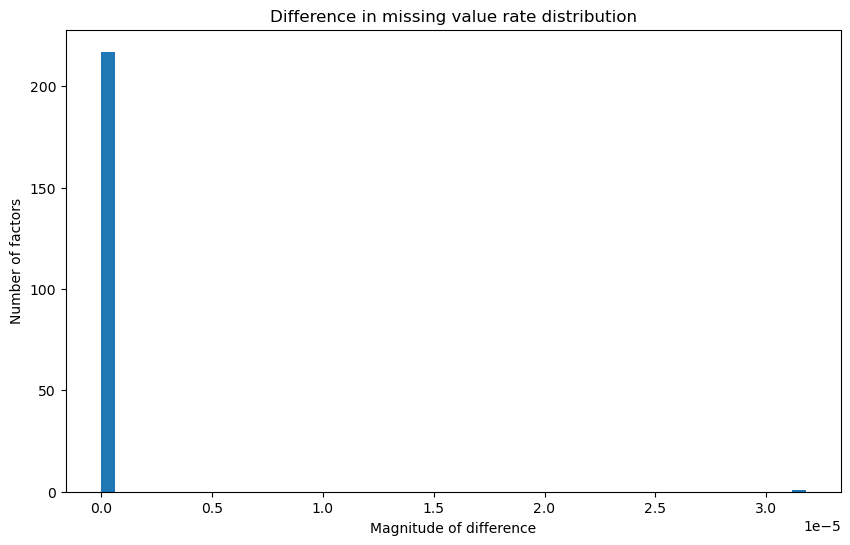

In [11]:
# 计算每个因子的空值率差异
null_ratios = pd.DataFrame()

# 计算data1和data2中每个因子的空值率
for col in data1.columns:
    if col != 'return':  # 跳过returns列
        data1_null_ratio = data1[col].isnull().sum() / len(data1)
        data2_null_ratio = data2[col].isnull().sum() / len(data2)
        null_ratios.loc[col, 'data1_null_ratio'] = data1_null_ratio
        null_ratios.loc[col, 'data2_null_ratio'] = data2_null_ratio
        null_ratios.loc[col, 'difference'] = abs(data1_null_ratio - data2_null_ratio)

# 按差异大小排序
null_ratios = null_ratios.sort_values('difference', ascending=False)

# 打印结果
print(f"总因子数量: {len(null_ratios)}")
print("\n空值率差异最大的前20个因子：")
print(null_ratios.head(20))

# 统计差异的分布
print("\n空值率差异的统计信息：")
print(null_ratios['difference'].describe())

# 找出差异超过1%的因子
significant_diff = null_ratios[null_ratios['difference'] > 0.01]
print(f"\n空值率差异超过1%的因子数量: {len(significant_diff)}")
if len(significant_diff) > 0:
    print("\n这些因子是：")
    print(significant_diff)

# 可视化差异分布
plt.figure(figsize=(10, 6))
plt.hist(null_ratios['difference'], bins=50)
plt.title('Difference in missing value rate distribution')
plt.xlabel('Magnitude of difference')
plt.ylabel('Number of factors')
plt.show()

我们准备删除这些空值率大于25%的因子，并且根据之前的测试，我们发现这些因子都空值率太大，高达75%的，没有测试的必要了。下面是展示，并且发现两种映射出来的数据，空值率太多的因子是一样的。

In [12]:
# 计算data1和data2中每个因子的空值率
data1_high_null = []
data2_high_null = []

for col in data1.columns:
    if col != 'return':  # 跳过returns列
        data1_null_ratio = data1[col].isnull().sum() / len(data1)
        data2_null_ratio = data2[col].isnull().sum() / len(data2)
        
        if data1_null_ratio > 0.25:
            data1_high_null.append((col, data1_null_ratio))
        if data2_null_ratio > 0.25:
            data2_high_null.append((col, data2_null_ratio))

# 按空值率降序排序
data1_high_null.sort(key=lambda x: x[1], reverse=True)
data2_high_null.sort(key=lambda x: x[1], reverse=True)

# 打印结果
print(f"data1中空值率>25%的因子数量: {len(data1_high_null)}")
print("\ndata1中空值率>25%的因子：")
for col, ratio in data1_high_null:
    print(f"{col}: {ratio:.2%}")

print(f"\ndata2中空值率>25%的因子数量: {len(data2_high_null)}")
print("\ndata2中空值率>25%的因子：")
for col, ratio in data2_high_null:
    print(f"{col}: {ratio:.2%}")

# 保存这些列名到变量中
data1_columns_to_drop = [col for col, _ in data1_high_null]
data2_columns_to_drop = [col for col, _ in data2_high_null]

# 检查是否有差异
if set(data1_columns_to_drop) != set(data2_columns_to_drop):
    print("\n注意：data1和data2中要删除的列不完全相同")
    print("data1中独有的列：", set(data1_columns_to_drop) - set(data2_columns_to_drop))
    print("data2中独有的列：", set(data2_columns_to_drop) - set(data1_columns_to_drop))
else:
    print("\ndata1和data2中要删除的列完全相同")

data1中空值率>25%的因子数量: 16

data1中空值率>25%的因子：
free_cash_flow_yoy_pct_chg: 75.46%
rdexp_to_total_mktcap_ttm: 66.67%
rdexp_to_asset_ttm: 66.67%
west_eps_fy1: 62.56%
changes_in_analyst_earnings_forecasts: 55.65%
dispersion_in_analyst_earnings_forecasts: 55.13%
west_stdeps_fy1: 55.13%
west_netprofit_fy1_1m: 54.73%
rating_avg: 54.22%
revisions_in_analyst_earnings_forecasts: 53.86%
west_eps_fy1_chg_1m: 53.13%
tail_risk_756: 38.41%
payout: 36.81%
total_cash_dividend_mra: 36.79%
current_asset_to_long_term_debt_mra: 35.35%
long_term_reversal_756: 27.78%

data2中空值率>25%的因子数量: 16

data2中空值率>25%的因子：
free_cash_flow_yoy_pct_chg: 75.46%
rdexp_to_total_mktcap_ttm: 66.67%
rdexp_to_asset_ttm: 66.67%
west_eps_fy1: 62.56%
changes_in_analyst_earnings_forecasts: 55.65%
dispersion_in_analyst_earnings_forecasts: 55.13%
west_stdeps_fy1: 55.13%
west_netprofit_fy1_1m: 54.73%
rating_avg: 54.22%
revisions_in_analyst_earnings_forecasts: 53.86%
west_eps_fy1_chg_1m: 53.13%
tail_risk_756: 38.41%
payout: 36.81%
total_cash_d

现在所展示的新空值率基本合理，可以作为我们的训练数据。

In [13]:
# 删除空值率>25%的列
data1_cleaned = data1.drop(columns=data1_columns_to_drop)
data2_cleaned = data2.drop(columns=data2_columns_to_drop)

# 计算新的空值率
def get_top_null_ratios(data, name):
    null_ratios = {}
    for col in data.columns:
        if col != 'return':
            null_ratio = data[col].isnull().sum() / len(data)
            null_ratios[col] = null_ratio
    
    # 按空值率降序排序
    sorted_ratios = sorted(null_ratios.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\n{name}中空值率最高的前10个因子：")
    for col, ratio in sorted_ratios[:10]:
        print(f"{col}: {ratio:.2%}")

# 显示数据信息
def show_data_info(data, name):
    print(f"\n{name}的信息：")
    print(f"时间范围: {data.index.get_level_values('date').min().date()} 到 {data.index.get_level_values('date').max().date()}")
    print(f"股票数量: {len(data.index.get_level_values('stock').unique())}")
    print(f"总行数: {len(data)}")
    print(f"列数: {len(data.columns)}")

# 显示结果
get_top_null_ratios(data1_cleaned, "data1_cleaned")
get_top_null_ratios(data2_cleaned, "data2_cleaned")

show_data_info(data1_cleaned, "data1_cleaned")
show_data_info(data2_cleaned, "data2_cleaned")


data1_cleaned中空值率最高的前10个因子：
investment_to_asset: 24.83%
fp_score: 22.81%
net_cash_flow_growth_to_asset: 22.39%
std_unexpected_net_profit_using_ar: 21.36%
co_skewness_252: 20.24%
price_delay_one_252: 19.81%
price_delay_three_252: 19.81%
price_delay_two_252: 19.81%
graham_score: 19.35%
earnings_announcement_return3: 19.32%

data2_cleaned中空值率最高的前10个因子：
investment_to_asset: 24.83%
fp_score: 22.81%
net_cash_flow_growth_to_asset: 22.39%
std_unexpected_net_profit_using_ar: 21.36%
co_skewness_252: 20.24%
price_delay_one_252: 19.81%
price_delay_three_252: 19.81%
price_delay_two_252: 19.81%
graham_score: 19.35%
earnings_announcement_return3: 19.32%

data1_cleaned的信息：
时间范围: 1998-01-31 到 2024-08-31
股票数量: 5371
总行数: 786652
列数: 203

data2_cleaned的信息：
时间范围: 1998-01-31 到 2024-08-31
股票数量: 5371
总行数: 786652
列数: 203


我们现在将里面的空值全部填充为0，这是合理的填充。因为数据已经映射到了[-1，1]之间。

In [14]:
# 将空值填充为0
data1_filled = data1_cleaned.fillna(0)
data2_filled = data2_cleaned.fillna(0)

# 检查填充后的空值情况
print("填充后的空值检查：")
print(f"data1_filled中的空值总数: {data1_filled.isnull().sum().sum()}")
print(f"data2_filled中的空值总数: {data2_filled.isnull().sum().sum()}")

# 检查填充后的数据形状
print("\n数据形状：")
print(f"data1_filled: {data1_filled.shape}")
print(f"data2_filled: {data2_filled.shape}")

# 检查填充后的基本统计信息
print("\n填充后的基本统计信息：")
print("\ndata1_filled:")
print(data1_filled.describe())
print("\ndata2_filled:")
print(data2_filled.describe())

填充后的空值检查：
data1_filled中的空值总数: 0
data2_filled中的空值总数: 0

数据形状：
data1_filled: (786652, 203)
data2_filled: (786652, 203)

填充后的基本统计信息：

data1_filled:
              return  total_skewness_252  net_profit_growth_to_asset  \
count  786652.000000       786652.000000               786652.000000   
mean        0.014314            0.011035                    0.012786   
std         0.429192            0.364601                    0.457209   
min        -1.000000           -1.000000                   -1.000000   
25%        -0.250000           -0.213654                   -0.213035   
50%        -0.000217            0.000000                   -0.003406   
75%         0.250000            0.205340                    0.165258   
max         1.000000            1.000000                    1.000000   

       information_discreteness  ebit_yoy_pct_chg  accrual_to_asset_ttm  \
count             786652.000000     786652.000000         786652.000000   
mean                  -0.001336          0.018485       

In [15]:
# 保存清洗后的数据
data1_filled.to_pickle("data1_cleaned.pkl")
data2_filled.to_pickle("data2_cleaned.pkl")

# 打印保存信息
print("数据已保存：")
print("1. data1_cleaned.pkl")
print("2. data2_cleaned.pkl")
print(f"\n保存位置：{os.getcwd()}")
print(f"\n数据形状：")
print(f"data1_cleaned: {data1_filled.shape}")
print(f"data2_cleaned: {data2_filled.shape}")

数据已保存：
1. data1_cleaned.pkl
2. data2_cleaned.pkl

保存位置：/Users/zm00035ml/Desktop/未命名文件夹

数据形状：
data1_cleaned: (786652, 203)
data2_cleaned: (786652, 203)


上面就是我们所洗完的数据。